In [3]:
import geopandas as gpd
import pandas as pd

# Load election data
data_dir = "../data/"
election_data = pd.read_csv(data_dir + "G20192-Columnes-ME-EN.csv", sep=';')
election_data

Province_code Province_name  Vegueria_code  \
0                25        Lleida              5   
1                 8     Barcelona              1   
2                 8     Barcelona              1   
3                 8     Barcelona              1   
4                 8     Barcelona              1   
...             ...           ...            ...   
8364             43     Tarragona              7   
8365              8     Barcelona             98   
8366             17        Girona             98   
8367             25        Lleida             98   
8368             43     Tarragona             98   

                       Vegueria_name  County_code     County_name  \
0     Alt Pirineu i territori d'Aran         25.0   Pallars Jussà   
1                          Barcelona         11.0  Baix Llobregat   
2                          Barcelona         11.0  Baix Llobregat   
3                          Barcelona         11.0  Baix Llobregat   
4                          Barcelona         11.0  Baix Llobregat   
...                              ...          ...             ...   
8364                Terres de l'Ebre          9.0       Baix Ebre   
8365               Residents Absents          NaN             NaN   
8366               Residents Absents          NaN             NaN   
8367               Residents Absents          NaN             NaN   
8368               Residents Absents          NaN             NaN   

      Municipality_code   Municipality_name  District  Section  ... VOX_votes  \
0                 25001  Abella de la Conca         1        1  ...         0   
1                  8001              Abrera         1        1  ...        12   
2                  8001              Abrera         1        1  ...        22   
3                  8001              Abrera         1        1  ...        32   
4                  8001              Abrera         1        2  ...        19   
...                 ...                 ...       ...      ...  ...       ...   
8364              43052               Xerta         1        1  ...         9   
8365               8998   Residents Absents         1        1  ...       785   
8366              17998   Residents Absents         1        1  ...        71   
8367              25998   Residents Absents         1        1  ...        54   
8368              43998   Residents Absents         1        1  ...        92   

      Cs_votes  PACMA_votes  MASPAIS_votes  RECORTES0_votes  IFEM_votes  \
0            2            0            NaN                0         NaN   
1           14            1            3.0                2         1.0   
2           25            2            6.0                2         0.0   
3           26            6           11.0                0         0.0   
4           13            6            5.0                0         0.0   
...        ...          ...            ...              ...         ...   
8364         3            3            NaN                1         NaN   
8365      1262          220          278.0              122        37.0   
8366       105           23            NaN               11         NaN   
8367        76           25            NaN                5         NaN   
8368       175           22            NaN               13         NaN   

      PUM+J_votes  PCTC_votes  PCPC_votes  IZQP_votes  
0               0           0           0           0  
1               1           0           0           0  
2               0           0           0           1  
3               1           0           0           0  
4               0           0           0           0  
...           ...         ...         ...         ...  
8364            1           0           0           0  
8365           46           8          19          19  
8366            4           2           1           2  
8367            4           4           2           0  
8368            1           1           2           7  

[8369

In [65]:
barcelona_data = election_data[election_data['Municipality_name'] == 'Barcelona']
district_data = barcelona_data.iloc[:, 21:].groupby(by=barcelona_data["District"]).sum()
district_data.reset_index()

District  ERC_votes  PSC_votes  ECP_votes  JUNTS_votes  PP_votes  \
0         1       5110       6135       5562         2580      1842   
1         2      30409      22839      19232        22901     12017   
2         3      20074      18189      15679         9089      6597   
3         4      10154       8129       4867         7960      6546   
4         5      14038      11969       6679        16545     15202   
5         6      15985       9438      10664        10799      4196   
6         7      18996      19676      15536         8923      7324   
7         8      12488      23188      14721         4050      8052   
8         9      18184      17785      14415         7432      6508   
9        10      26711      26440      21048        11355      9696   

   CUP_votes  VOX_votes  Cs_votes  PACMA_votes  MASPAIS_votes  \
0       2229       1255      1344          351          501.0   
1      11078       5776      6823         1140         2276.0   
2       6897       4147      4634          878         1452.0   
3       2610       3034      3116          387          620.0   
4       4115       6495      5229          667          842.0   
5       7280       2116      2566          584         1013.0   
6       6384       4632      5060          996         1361.0   
7       3139       5705      5632         1009         1319.0   
8       5329       4090      4950          883         1354.0   
9       8021       6225      7131         1342         2122.0   

   RECORTES0_votes  IFEM_votes  PUM+J_votes  PCTC_votes  PCPC_votes  \
0               89        41.0           19          28          28   
1              210        93.0           71          38          47   
2              169        71.0           38          49          43   
3               61        33.0           27          13           9   
4               80        63.0           55          20          24   
5              116        70.0           43          24          24   
6              140        86.0           55          53          45   
7              159        71.0           74          53          58   
8              130        60.0           47          26          20   
9              197       218.0           60          45          71   

   IZQP_votes  
0          12  
1          33  
2          40  
3          15  
4          17  
5          20  
6          40  
7          25  
8          35  
9          56

In [66]:
winner_by_district=district_data.idxmax(axis=1)
winner_by_district.reset_index()
list_winners=list(winner_by_district)
district_data['winner']=list_winners
district_data

ERC_votes  PSC_votes  ECP_votes  JUNTS_votes  PP_votes  CUP_votes  \
District                                                                      
1              5110       6135       5562         2580      1842       2229   
2             30409      22839      19232        22901     12017      11078   
3             20074      18189      15679         9089      6597       6897   
4             10154       8129       4867         7960      6546       2610   
5             14038      11969       6679        16545     15202       4115   
6             15985       9438      10664        10799      4196       7280   
7             18996      19676      15536         8923      7324       6384   
8             12488      23188      14721         4050      8052       3139   
9             18184      17785      14415         7432      6508       5329   
10            26711      26440      21048        11355      9696       8021   

          VOX_votes  Cs_votes  PACMA_votes  MASPAIS_votes  RECORTES0_votes  \
District                                                                     
1              1255      1344          351          501.0               89   
2              5776      6823         1140         2276.0              210   
3              4147      4634          878         1452.0              169   
4              3034      3116          387          620.0               61   
5              6495      5229          667          842.0               80   
6              2116      2566          584         1013.0              116   
7              4632      5060          996         1361.0              140   
8              5705      5632         1009         1319.0              159   
9              4090      4950          883         1354.0              130   
10             6225      7131         1342         2122.0              197   

          IFEM_votes  PUM+J_votes  PCTC_votes  PCPC_votes  IZQP_votes  \
District                                                                
1               41.0           19          28          28          12   
2               93.0           71          38          47          33   
3               71.0           38          49          43          40   
4               33.0           27          13           9          15   
5               63.0           55          20          24          17   
6               70.0           43          24          24          20   
7               86.0           55          53          45          40   
8               71.0           74          53          58          25   
9               60.0           47          26          20          35   
10             218.0           60          45          71          56   

               winner  
District               
1           PSC_votes  
2           ERC_votes  
3           ERC_votes  
4           ERC_votes  
5         JUNTS_votes  
6           ERC_votes  
7           PSC_votes  
8           PSC_votes  
9           ERC_votes  
10          ERC_votes

NOM                                           geometry  \
0         Ciutat Vella  POLYGON ((2.18345 41.39061, 2.18459 41.38976, ...   
1             Eixample  POLYGON ((2.18690 41.40165, 2.18689 41.40087, ...   
2       Sants-Montjuïc  MULTIPOLYGON (((2.14824 41.37623, 2.14896 41.3...   
3            Les Corts  POLYGON ((2.10342 41.40110, 2.10352 41.40109, ...   
4  Sarrià-Sant Gervasi  MULTIPOLYGON (((2.07313 41.43522, 2.07319 41.4...   
5               Gràcia  POLYGON ((2.13629 41.42363, 2.13640 41.42358, ...   
6       Horta-Guinardó  POLYGON ((2.15949 41.44977, 2.15942 41.44960, ...   
7           Nou Barris  POLYGON ((2.18706 41.46772, 2.18711 41.46711, ...   
8          Sant Andreu  POLYGON ((2.18764 41.46212, 2.18765 41.46208, ...   
9           Sant Martí  POLYGON ((2.20736 41.42711, 2.20698 41.42665, ...   

   District  
0         1  
1         2  
2         3  
3         4  
4         5  
5         6  
6         7  
7         8  
8         9  
9        10

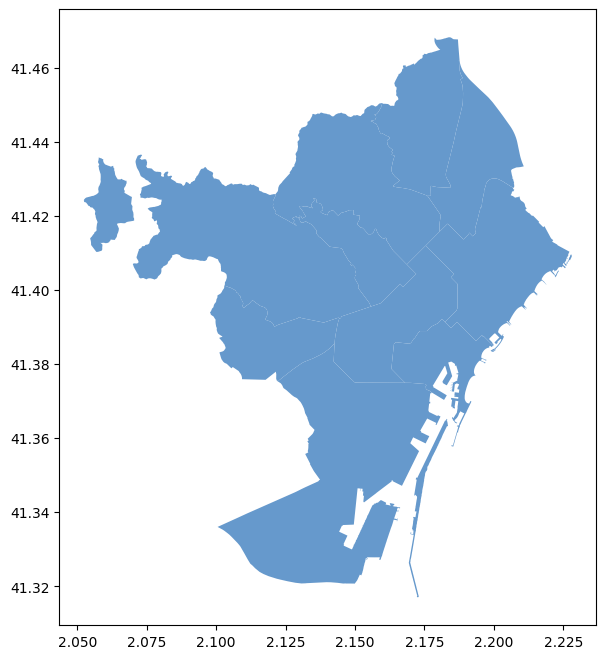

In [5]:
# Load all importance packages
import geopandas
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from subprocess import check_output

bcn = geopandas.read_file(data_dir + "districts_BCN.geojson")
bcn.head()
bcn = bcn[['NOM','geometry']]
bcn.plot(color='#6699cc',figsize=(15,8))
bcn.rename(columns={'DISTRICTE': 'District'}, inplace=True)
bcn_gpd = gpd.GeoDataFrame(bcn)
#bcn_gpd.reset_index
bcn_gpd['District']=[1,2,3,4,5,6,7,8,9,10]
bcn_gpd

In [68]:
merged_data = bcn_gpd.merge(district_data, on='District')
merged_data

NOM                                           geometry  \
0         Ciutat Vella  POLYGON ((2.18345 41.39061, 2.18459 41.38976, ...   
1             Eixample  POLYGON ((2.18690 41.40165, 2.18689 41.40087, ...   
2       Sants-Montjuïc  MULTIPOLYGON (((2.14824 41.37623, 2.14896 41.3...   
3            Les Corts  POLYGON ((2.10342 41.40110, 2.10352 41.40109, ...   
4  Sarrià-Sant Gervasi  MULTIPOLYGON (((2.07313 41.43522, 2.07319 41.4...   
5               Gràcia  POLYGON ((2.13629 41.42363, 2.13640 41.42358, ...   
6       Horta-Guinardó  POLYGON ((2.15949 41.44977, 2.15942 41.44960, ...   
7           Nou Barris  POLYGON ((2.18706 41.46772, 2.18711 41.46711, ...   
8          Sant Andreu  POLYGON ((2.18764 41.46212, 2.18765 41.46208, ...   
9           Sant Martí  POLYGON ((2.20736 41.42711, 2.20698 41.42665, ...   

   District  ERC_votes  PSC_votes  ECP_votes  JUNTS_votes  PP_votes  \
0         1       5110       6135       5562         2580      1842   
1         2      30409      22839      19232        22901     12017   
2         3      20074      18189      15679         9089      6597   
3         4      10154       8129       4867         7960      6546   
4         5      14038      11969       6679        16545     15202   
5         6      15985       9438      10664        10799      4196   
6         7      18996      19676      15536         8923      7324   
7         8      12488      23188      14721         4050      8052   
8         9      18184      17785      14415         7432      6508   
9        10      26711      26440      21048        11355      9696   

   CUP_votes  VOX_votes  Cs_votes  PACMA_votes  MASPAIS_votes  \
0       2229       1255      1344          351          501.0   
1      11078       5776      6823         1140         2276.0   
2       6897       4147      4634          878         1452.0   
3       2610       3034      3116          387          620.0   
4       4115       6495      5229          667          842.0   
5       7280       2116      2566          584         1013.0   
6       6384       4632      5060          996         1361.0   
7       3139       5705      5632         1009         1319.0   
8       5329       4090      4950          883         1354.0   
9       8021       6225      7131         1342         2122.0   

   RECORTES0_votes  IFEM_votes  PUM+J_votes  PCTC_votes  PCPC_votes  \
0               89        41.0           19          28          28   
1              210        93.0           71          38          47   
2              169        71.0           38          49          43   
3               61        33.0           27          13           9   
4               80        63.0           55          20          24   
5              116        70.0           43          24          24   
6              140        86.0           55          53          45   
7              159        71.0           74          53          58   
8              130        60.0           47          26          20   
9              197       218.0           60          45          71   

   IZQP_votes       winner  
0          12    PSC_votes  
1          33    ERC_votes  
2          40    ERC_votes  
3          15    ERC_votes  
4          17  JUNTS_votes  
5          20    ERC_votes  
6          40    PSC_votes  
7          25    PSC_votes  
8          35    ERC_votes  
9          56    ERC_votes

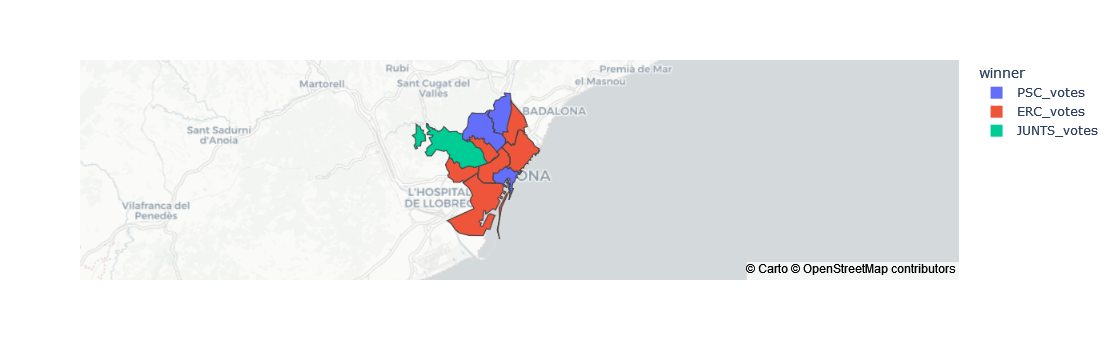

In [76]:
import plotly.express as px

fig = px.choropleth_mapbox(
    merged_data,
    geojson=merged_data.geometry,
    locations=merged_data.index,
    color='winner',  # Change to the column you want to visualize
    hover_name='District',
    mapbox_style="carto-positron",
    center={"lat": 41.8781, "lon": 1.7834},  # Center of Catalonia
    zoom=14
)

fig.update_geos(fitbounds="locations", visible=False)
fig.show()